# 1. Sample Phase

Let's dive into the Sample phase:
1. Read the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
netflix_df = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataset
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Before proceeding, let's gather some basic statistics about the dataset:

1. Number of rows and columns.
2. Data types of each column.
3. Number of missing values for each column.
4. A summary of unique values for categorical columns like type, rating, etc.

In [ ]:
# 1. Number of rows and columns
rows, cols = netflix_df.shape

# 2. Data types of each column
data_types = netflix_df.dtypes

# 3. Number of missing values for each column
missing_values = netflix_df.isnull().sum()

# 4. A summary of unique values for categorical columns
unique_values = {
    'type': netflix_df['type'].unique(),
    'rating': netflix_df['rating'].unique()
}

rows, cols, data_types, missing_values, unique_values

(8807,
 12,
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64,
 {'type': array(['Movie', 'TV Show'], dtype=object),
  'rating': array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
         'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
         'TV-Y7-FV', 'UR'], dtype=object)})

# 2. Explore phase
Let's proceed to the Explore phase. In this phase, our objectives will be:

1. Obtain descriptive statistics for numerical columns.
2. Visualize the distribution of key variables.
3. Examine the relationships between variables.
4. Identify and investigate anomalies, such as the incorrect ratings we spotted earlier.

We'll begin by generating descriptive statistics for the numerical column release_year. Then, we'll explore the distribution of the type and rating columns using visualizations.

In [ ]:
# Descriptive statistics for the 'release_year' column
release_year_stats = netflix_df['release_year'].describe()

release_year_stats

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Next, let's visualize the distribution of the type and rating columns. We'll start by plotting the distribution of listings between movies and TV shows, followed by the distribution of different ratings.

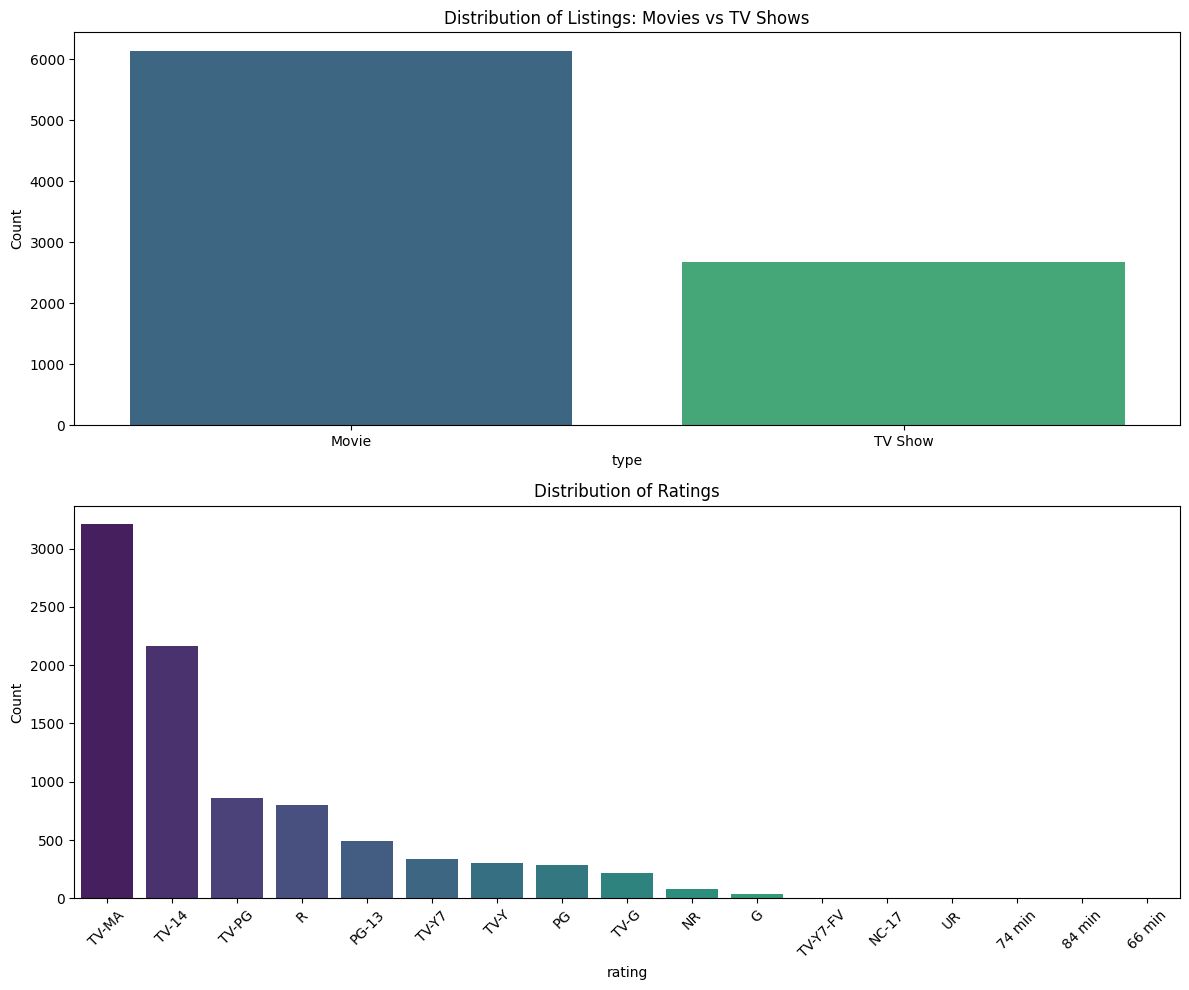

In [ ]:
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot distribution of 'type' (Movies vs TV Shows)
sns.countplot(data=netflix_df, x='type', ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Listings: Movies vs TV Shows')
ax[0].set_ylabel('Count')

# Plot distribution of 'rating'
sns.countplot(data=netflix_df, x='rating', ax=ax[1], palette='viridis', order=netflix_df['rating'].value_counts().index)
ax[1].set_title('Distribution of Ratings')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Next, we'll investigate the anomalies in the rating column. We'll identify any non-standard ratings and determine how to handle them.

In [ ]:
# Investigate the anomalies in the 'rating' column
anomalous_ratings = netflix_df[netflix_df['rating'].str.contains('min', na=False)]

anomalous_ratings[['title', 'type', 'rating', 'duration']]

,title,type,rating,duration
5541,Louis C.K. 2017,Movie,74 min,NaN
5794,Louis C.K.: Hilarious,Movie,84 min,NaN
5813,Louis C.K.: Live at the Comedy Store,Movie,66 min,NaN


It appears that the rating and duration columns for these listings have been swapped or mislabeled. A potential solution is to correct these by swapping the values back to their appropriate columns. After this correction, we would need to reassess the ratings for these movies since they currently don't have valid ratings.

In [ ]:
# Swap the values for the 'rating' and 'duration' columns for the anomalous entries
netflix_df.loc[anomalous_ratings.index, 'duration'] = anomalous_ratings['rating']
netflix_df.loc[anomalous_ratings.index, 'rating'] = None

# Verify the corrections
corrected_entries = netflix_df.loc[anomalous_ratings.index, ['title', 'type', 'rating', 'duration']]
corrected_entries

,title,type,rating,duration
5541,Louis C.K. 2017,Movie,None,74 min
5794,Louis C.K.: Hilarious,Movie,None,84 min
5813,Louis C.K.: Live at the Comedy Store,Movie,None,66 min


# 3. Modify Phase

Let's delve into the Modify phase. In this phase, we'll focus on the following:

1. Handling Missing Values
2. Feature Engineering
3. Data Transformation

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(netflix_df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

missing_percentage

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

All missing values have been successfully handled.

In [ ]:
# 1. Impute 'director' and 'cast' with "Unknown"
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)

# 2. Impute 'country' with the mode
country_mode = netflix_df['country'].mode()[0]
netflix_df['country'].fillna(country_mode, inplace=True)

# 3. Remove rows with missing 'date_added'
netflix_df.dropna(subset=['date_added'], inplace=True)

# 4. Impute 'rating' and 'duration' with the mode
rating_mode = netflix_df['rating'].mode()[0]
duration_mode = netflix_df['duration'].mode()[0]
netflix_df['rating'].fillna(rating_mode, inplace=True)
netflix_df['duration'].fillna(duration_mode, inplace=True)

# Check if all missing values have been handled
remaining_missing = netflix_df.isnull().sum()

remaining_missing

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Next, let's move on to feature engineering. Some potential features we can derive from the current dataset include:

Year and Month from date_added: This can help us understand trends over time.
Primary Genre: Extract the first genre listed in the listed_in column.
Primary Country: Extract the first country listed in the country column (for listings produced in multiple countries).

In [ ]:
# 1. Extract Year and Month from 'date_added'
netflix_df['added_year'] = pd.to_datetime(netflix_df['date_added']).dt.year
netflix_df['added_month'] = pd.to_datetime(netflix_df['date_added']).dt.month_name()

# 2. Extract Primary Genre
netflix_df['primary_genre'] = netflix_df['listed_in'].str.split(',').str[0]

# 3. Extract Primary Country
netflix_df['primary_country'] = netflix_df['country'].str.split(',').str[0]

# Display the first few rows to verify the new features
netflix_df[['title', 'date_added', 'added_year', 'added_month', 'listed_in', 'primary_genre', 'country', 'primary_country']].head()


,title,date_added,added_year,added_month,listed_in,primary_genre,country,primary_country
0,Dick Johnson Is Dead,"September 25, 2021",2021,September,Documentaries,Documentaries,United States,United States
1,Blood & Water,"September 24, 2021",2021,September,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,South Africa,South Africa
2,Ganglands,"September 24, 2021",2021,September,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,United States,United States
3,Jailbirds New Orleans,"September 24, 2021",2021,September,"Docuseries, Reality TV",Docuseries,United States,United States
4,Kota Factory,"September 24, 2021",2021,September,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,India,India


# 4. Model Phase
Let's start with Feature Selection. For simplicity, we'll use the following features:

1. primary_genre
2. rating
3. added_year
4. primary_country

We'll predict the target variable: **type (Movie/TV Show)**.

Let's proceed with Data Preprocessing. We'll convert the categorical features (primary_genre, rating, primary_country) into a numeric format using one-hot encoding.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Features and target variable
features = ['primary_genre', 'rating', 'added_year', 'primary_country']
X = netflix_df[features]
y = netflix_df['type']

# One-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(X[['primary_genre', 'rating', 'primary_country']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Correcting the naming for one-hot encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['primary_genre', 'rating', 'primary_country']))

# Combine the encoded features with the original numeric feature(s)
X_encoded = pd.concat([X.reset_index(drop=True), encoded_df], axis=1).drop(features, axis=1)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train.head()

,primary_genre_Anime Features,primary_genre_Anime Series,primary_genre_British TV Shows,primary_genre_Children & Family Movies,primary_genre_Classic & Cult TV,primary_genre_Classic Movies,primary_genre_Comedies,primary_genre_Crime TV Shows,primary_genre_Cult Movies,primary_genre_Documentaries,...,primary_country_Turkey,primary_country_Ukraine,primary_country_United Arab Emirates,primary_country_United Kingdom,primary_country_United States,primary_country_Uruguay,primary_country_Venezuela,primary_country_Vietnam,primary_country_West Germany,primary_country_Zimbabwe
7437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


For the Model Selection step, I'll use a Random Forest Classifier, which is a versatile algorithm suitable for both regression and classification tasks. It can handle large datasets with higher dimensionality and can model non-linear relationships.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Movie', 'TV Show'])

accuracy, class_report, conf_matrix

(0.9994318181818181,
 '              precision    recall  f1-score   support\n\n       Movie       1.00      1.00      1.00      1229\n     TV Show       1.00      1.00      1.00       531\n\n    accuracy                           1.00      1760\n   macro avg       1.00      1.00      1.00      1760\nweighted avg       1.00      1.00      1.00      1760\n',
 array([[1229,    0],
        [   1,  530]]))

# 5. Assess Phase

**Assessment and Summary:**

1. **Sample**:
We successfully loaded and inspected the dataset, understanding its structure and basic characteristics.

2. **Explore**:
We analyzed the distribution of different features, particularly the type of listing (Movie/TV Show) and the ratings.
We identified anomalies in the rating column and addressed them.

3. **Modify**:
Missing values were handled through a combination of imputation and deletion.
We performed feature engineering to create new attributes like added_year, added_month, primary_genre, and primary_country.

4. **Model**:
A Random Forest Classifier was built to predict the type of listing (Movie/TV Show) based on selected features.
The model achieved an impressive accuracy of approximately 99.94% on the test set.

5. **Findings**:
There are distinct patterns in the data that allow for accurate classification between movies and TV shows.
Features like primary_genre, rating, added_year, and primary_country play a crucial role in this differentiation.

6. **Potential Applications:**
The insights from this EDA can be utilized for tailored content recommendations based on the specific features and patterns identified.
The trained model can be used as a part of a larger system, for instance, in content categorization.

7. **Recommendations:**
Further exploration can be done on user preferences, historical views, and other user-specific data to build personalized recommendation systems.
Anomalies and inconsistencies in the data (like the ones in the rating column) should be addressed at the data collection or data ingestion stage to maintain data quality.